In [1]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls /content/drive/MyDrive/Datasets/'Kaggle Transformed'



'X_test without PCA.csv'  'X_train without PCA.csv'   y_test.csv
'X_test with PCA.csv'	  'X_train with PCA.csv'      y_train.csv


In [4]:
!pip install pandas


In [5]:
import pandas as pd

In [6]:
X_train = pd.read_csv('/content/drive/MyDrive/Datasets/Kaggle Transformed/X_train without PCA.csv')
y_train = pd.read_csv('/content/drive/MyDrive/Datasets/Kaggle Transformed/y_train.csv').values.ravel()
X_test = pd.read_csv('/content/drive/MyDrive/Datasets/Kaggle Transformed/X_test without PCA.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Datasets/Kaggle Transformed/y_test.csv').values.ravel()

In [7]:
gb_model = GradientBoostingRegressor(n_estimators=800, learning_rate=0.065, max_depth=6, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.065, max_depth=6, n_estimators=800,
                          random_state=42)

In [8]:
y_pred = gb_model.predict(X_test)

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 1.1101057614660106
Mean Squared Error: 3.0451932561541817
R-squared: 0.9658184111757226


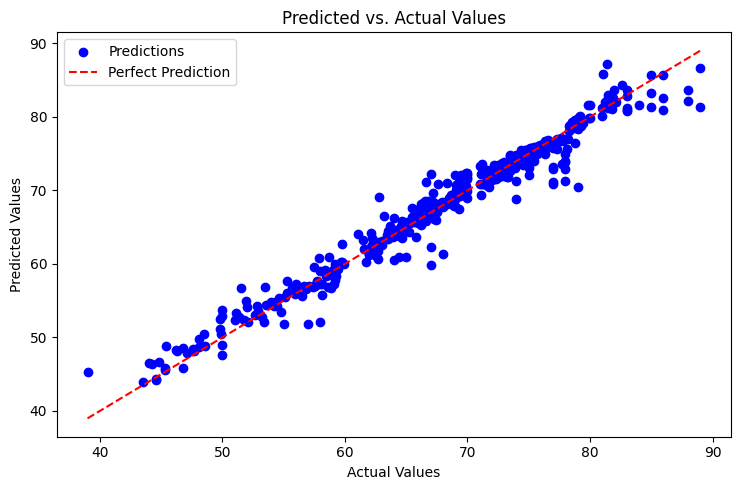

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))


ax.scatter(y_test, y_pred, color='blue', label='Predictions')


min_value = min(min(y_test), min(y_pred))
max_value = max(max(y_test), max(y_pred))
ax.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', label='Perfect Prediction')


ax.set_title('Predicted vs. Actual Values')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')



ax.set_aspect(0.6)


ax.legend()


plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [ 900, 950, 1000],
    'learning_rate': [0.06,0.065, 0.75],
    'max_depth': [5,6,7],
}

grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'learning_rate': 0.065, 'max_depth': 5, 'n_estimators': 1000}


In [ ]:
best_gb_model = grid_search.best_estimator_
y_pred = best_gb_model.predict(X_test)

In [ ]:
tuned_mae = mean_absolute_error(y_test,y_pred)
tuned_mse = mean_squared_error(y_test, y_pred)
tuned_r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error (Tuned Model):", tuned_mae)
print("Mean Squared Error (Tuned Model):", tuned_mse)
print("R-squared (Tuned Model):", tuned_r2)

Mean Absolute Error (Tuned Model): 1.1237813416870635
Mean Squared Error (Tuned Model): 3.0337270856514933
R-squared (Tuned Model): 0.9659471162832621
